<a href="https://colab.research.google.com/github/fursew05/DOE/blob/main/%EC%8B%A4%ED%97%98%EA%B3%84%ED%9A%8D%EB%B2%95_5%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### $2^k$ Factorial Design
- k개의 관심있는 요인에 관한 주제임
- 각 요인의 수준은 2개(low or high)
- 많은 요인이 포함되는 초기 연구에서 자주 사용

- $2^k$ Factorial Design 모형에서는 세가지의 가정이 들어감


1.   각 요인들은 고정되어 있다(fixed factor, 즉 random effect가 아님)
2.   완전무작위배치 (실험 순서는 랜덤하게 진행)
3.   데이터들의 분포는 정규분포



## $2^2$ Design

- 2가지 factor + factor 당 two levels
- 총 4가지 경우에 대한 실험을 진행한다
- 총 실험횟수는 각 배치마다 n번 측정할 때, 4*n번의 실험을 진행

In [2]:
import pandas as pd
# 2^2 Design에서 각 배치마다 3번씩 관찰, 총 12번의 실험 진행
df = pd.DataFrame(
    {"A": ['low','low','low','high','high','high','low','low','low','high','high','high'],
     'B': ['low','low','low','low','low','low','high','high','high','high','high','high'],
     'value': [28,25,27,36,32,32,18,19,23,31,30,29]}
)
df

,A,B,value
0,low,low,28
1,low,low,25
2,low,low,27
3,high,low,36
4,high,low,32
5,high,low,32
6,low,high,18
7,low,high,19
8,low,high,23
9,high,high,31


In [3]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols("value ~ C(A)*C(B)",data=df).fit()
anova_table = anova_lm(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(A),1.0,208.333333,208.333333,53.191489,0.000084
C(B),1.0,75.000000,75.000000,19.148936,0.002362
C(A):C(B),1.0,8.333333,8.333333,2.127660,0.182776
Residual,8.0,31.333333,3.916667,NaN,NaN


- 결과 해석 : main effect of A > main effect of B > interaction effect of A,B
- 유의수준 5%에서 main effect만 유효한 것을 알 수 있음

## $2^3$ Factorial Design
- 2가지 요인에 대해서 각 요인의 수준이 3개인 경우
- 총 8가지의 설계를 진행한다((1),A,B,C,AB,AC,BC,ABC)
- 각 요인을 넣으면 1, 넣지 않으면 0으로 표현한 행렬이 Design matrix이며
Design matrix의 열벡터(Contrast)끼리는 서로 직교한다

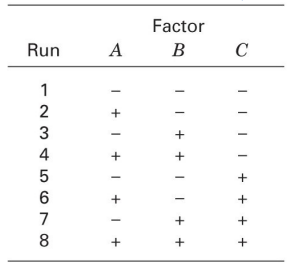

- 특징
1. I(모든 factor가 없는 상태)를 제외하고는 '-'와 '+'의 개수는 같음
2. 직교성(contrast 간 내적하면 0)
3. I는 contrast가 (1,1,...,1)이여서 항등원이 됨
예시)IA = A, IAB =AB
4. contrast는 -1 또는 1이 때문에 제곱하면 I가 됨
따라서, ABC * BC = AII = A

In [5]:
# 2^3 design 예시 - 위의 design matrix를 기반으로 실험 진행 각 Run 마다 2번의 실험 진행 2^3*2 = 16번 진행

df = pd.DataFrame(
    {"gap" : ["-","-","+","+","-","-","+","+","-","-","+","+","-","-","+","+"],
     "flow" : ["-","-","-","-","+","+","+","+","-","-","-","-","+","+","+","+"],
     "power" : ["-","-","-","-","-","-","-","-","+","+","+","+","+","+","+","+"],
     "etch_rate" : [550,604,669,650,633,601,642,635,1037,1052,749,868,1075,1063,729,860]}
)

model = ols("etch_rate ~ C(gap)*C(flow)*C(power)",data=df).fit()
anova_table = anova_lm(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(gap),1.0,41310.5625,41310.5625,18.339364,0.002679
C(flow),1.0,217.5625,217.5625,0.096584,0.763911
C(power),1.0,374850.0625,374850.0625,166.410505,0.000001
C(gap):C(flow),1.0,2475.0625,2475.0625,1.098776,0.325168
C(gap):C(power),1.0,94402.5625,94402.5625,41.908965,0.000193
C(flow):C(power),1.0,18.0625,18.0625,0.008019,0.930849
C(gap):C(flow):C(power),1.0,126.5625,126.5625,0.056186,0.818586
Residual,8.0,18020.5000,2252.5625,NaN,NaN


- gap과 power의 main effect, 둘의 interaction effect가 유효하다는 것을 알 수 있다

## $2^k$ Design에서 각 배치당 한번의 실험을 하게 되는 경우

- 요인의 개수가 늘어나게 되면 실험 횟수가 늘어나게 되어 실험에 사용하는 자원이 부족해지고 이에 따라 실험 횟수를 줄일 수 밖에 없는 상황이 발생

- n = 1인 경우에서 모델을 적합하는 경우 noise로 인하여 잘못된 결론을 내릴 수 있
(factor의 effect가 왜곡될 수 있음)

- 이때 sparsity of effects principle을 활용하게 되는데, sparsity of effects principle이란 고차원의 교호작용을 무시할 수 있다는 원칙임

- 즉 2^4 FD에서는 3차,4차 교호작용을 무시한다는 것

In [9]:
#예시 : 2^4 Factorial Design

df = pd.DataFrame({
    'A' : ["-","+","-","+","-","+","-","+","-","+","-","+","-","+","-","+"],
    'B' : ["-","-","+","+","-","-","+","+","-","-","+","+","-","-","+","+"],
    "_C" : ["-","-","-","-","+","+","+","+","-","-","-","-","+","+","+","+"],
    "D" : ["-","-","-","-","-","-","-","-","+","+","+","+","+","+","+","+"],
    "run_label" : ['(1)',"a","b","ab","c","ac","bc","abc","d","ad","bd","abd","cd",
                   "acd","bcd","abcd"],
    "Filtration_rate" : [45,71,48,65,68,60,80,65,43,100,45,104,75,86,70,76]
})

df

,A,B,_C,D,run_label,Filtration_rate
0,-,-,-,-,(1),45
1,+,-,-,-,a,71
2,-,+,-,-,b,48
3,+,+,-,-,ab,65
4,-,-,+,-,c,68
5,+,-,+,-,ac,60
6,-,+,+,-,bc,80
7,+,+,+,-,abc,65
8,-,-,-,+,d,43
9,+,-,-,+,ad,100
